# Predicting autism using fMRI data : Exploratory Data Analysis

## 1) Background on autism and the problem :

#### What is autism:
Autism spectrum disorder (ASD) is a developmental disorder that affects communication and behavior. Although autism can be diagnosed at any age, it is said to be a “developmental disorder” because symptoms generally appear in the first two years of life. 
Autism is known as a “spectrum” disorder because there is wide variation in the type and severity of symptoms people experience. ASD occurs in all ethnic, racial, and economic groups. Although ASD can be a lifelong disorder, treatments and services can improve a person’s symptoms and ability to function. The American Academy of Pediatrics recommends that all children be screened for autism. 

People with ASD have difficulty with social communication and interaction, restricted interests, and repetitive behaviors. 
Doctors diagnose ASD by looking at a person’s behavior and development. ASD can usually be reliably diagnosed by the age of two. It is important for those with concerns to seek out assessment as soon as possible so that a diagnosis can be made, and treatment can begin. <br>
https://www.nimh.nih.gov/health/topics/autism-spectrum-disorders-asd/index.shtml

## The problem:
Previously considered rare, ASD is now recognized to occur in more than 1% of children. Despite continuing research advances, their pace and clinical impact have not kept up with the urgency to identify ways of determining the diagnosis at earlier ages, selecting optimal treatments, and predicting outcomes. For the most part this is due to the complexity and heterogeneity of ASD. To face these challenges, large-scale samples are essential, but single laboratories cannot obtain sufficiently large datasets to reveal the brain mechanisms underlying ASD. This is why the ABIDE dataset was created, to allow all people in science to try out advancing on this difficult topic.

#### What this notebook aims to do:
The American Academy of Pediatrics recommends that all children be screened for autism. With all those results, interpretation and correct identification of ASD children could be a problem. I think that machine learning could help ease the work of medical professionals and allow them to have reliable trained models that can give indications on the diagnostic of children. For this project I would like to implement different classification models in machine learning to detect and identify ASD children based on their fMRI data.
http://fcon_1000.projects.nitrc.org/indi/abide/

#### fMRI data:
An fMRI scan is a functional magnetic resonance imaging scan that measures and maps the brain’s activity. An fMRI scan uses the same technology as an MRI scan. An MRI is a noninvasive test that uses a strong magnetic field and radio waves to create an image of the brain. The image an MRI scan produces is just of organs/tissue, but an fMRI will produce an image showing the blood flow in the brain. By showing the blood flow it will display which parts of the brain are being stimulated. <br>
https://www.jameco.com/Jameco/workshop/HowItWorks/what-is-an-fmri-scan-and-how-does-it-work.html

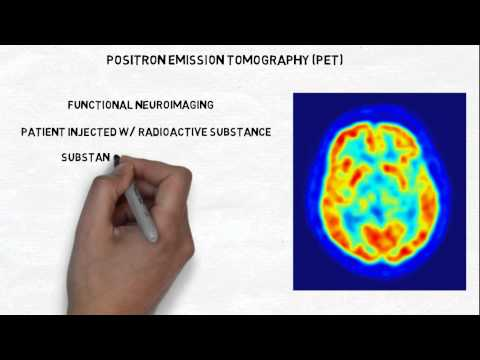

In [1]:
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo('N2apCx1rlIQ',width=600, height=400)

#### fMRI and ASD:
Functional magnetic resonance imaging (fMRI) has proven to be a useful tool to investigate aberrant neurobiological function in ASDs because of its excellent contrast properties, spatial resolution, and temporal resolution. <br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3513685/


# EDA on fMRI data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import nilearn as nl
from nilearn import datasets
from nilearn import plotting

In this EDA I will try plotting the correlation matrix based on several criterions such as the correlation type, with or without confounds and with two different atlas.

Summary :

* Loading of te data
* Plotting correlation matrix 
* Plotting correlation matrix with confounds ?
* Plotting correlation matrix with the tangent correlation 

* Trying out the MSDL atlas 

In [2]:
asd_fmri = nl.datasets.fetch_abide_pcp(data_dir='E:\ASD_cpac', n_subjects=50,  pipeline='cpac')

asd_fmri.keys()

C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\numpy\lib\npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


dict_keys(['description', 'phenotypic', 'func_preproc'])

In [3]:
func_prep = asd_fmri.func_preproc
print(func_prep[:10])

['E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050003_func_preproc.nii.gz', 'E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050004_func_preproc.nii.gz', 'E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050005_func_preproc.nii.gz', 'E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050006_func_preproc.nii.gz', 'E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050007_func_preproc.nii.gz', 'E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050008_func_preproc.nii.gz', 'E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050010_func_preproc.nii.gz', 'E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050011_func_preproc.nii.gz', 'E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050012_func_preproc.nii.gz', 'E:\\ASD_cpac\\ABIDE_pcp\\cpac\\nofilt_noglobal\\Pitt_0050013_func_preproc.nii.gz']


Atlas ROIs are located at: C:\Users\xavier/nilearn_data\basc_multiscale_2015\template_cambridge_basc_multiscale_nii_sym\template_cambridge_basc_multiscale_sym_scale064.nii.gz


ConnectivityMeasure(cov_estimator=LedoitWolf(assume_centered=False, block_size=1000, store_precision=False),
          discard_diagonal=False, kind='correlation', vectorize=False)

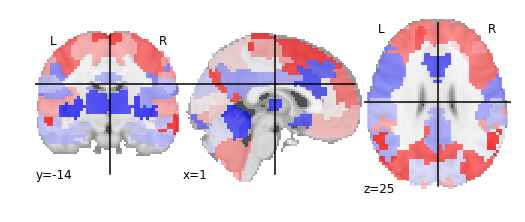

In [4]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn import connectome

# First, let's load a parcellation that we'd like to use
multiscale = datasets.fetch_atlas_basc_multiscale_2015(resume=True)
print('Atlas ROIs are located at: %s' % multiscale.scale064)

# print(multiscale.description)

# Get labels
maps = 'scale064'

labels = list()
for val in range(1, int(maps[-3:]) + 1):
    labels.append('C' + str(val))
    
plotting.plot_roi(multiscale.scale064, cmap=plotting.cm.bwr)

label_masker = NiftiLabelsMasker(labels_img=multiscale.scale064, standardize=True)
label_masker


correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_measure

### Plotting the matrix of the first 8 patients.

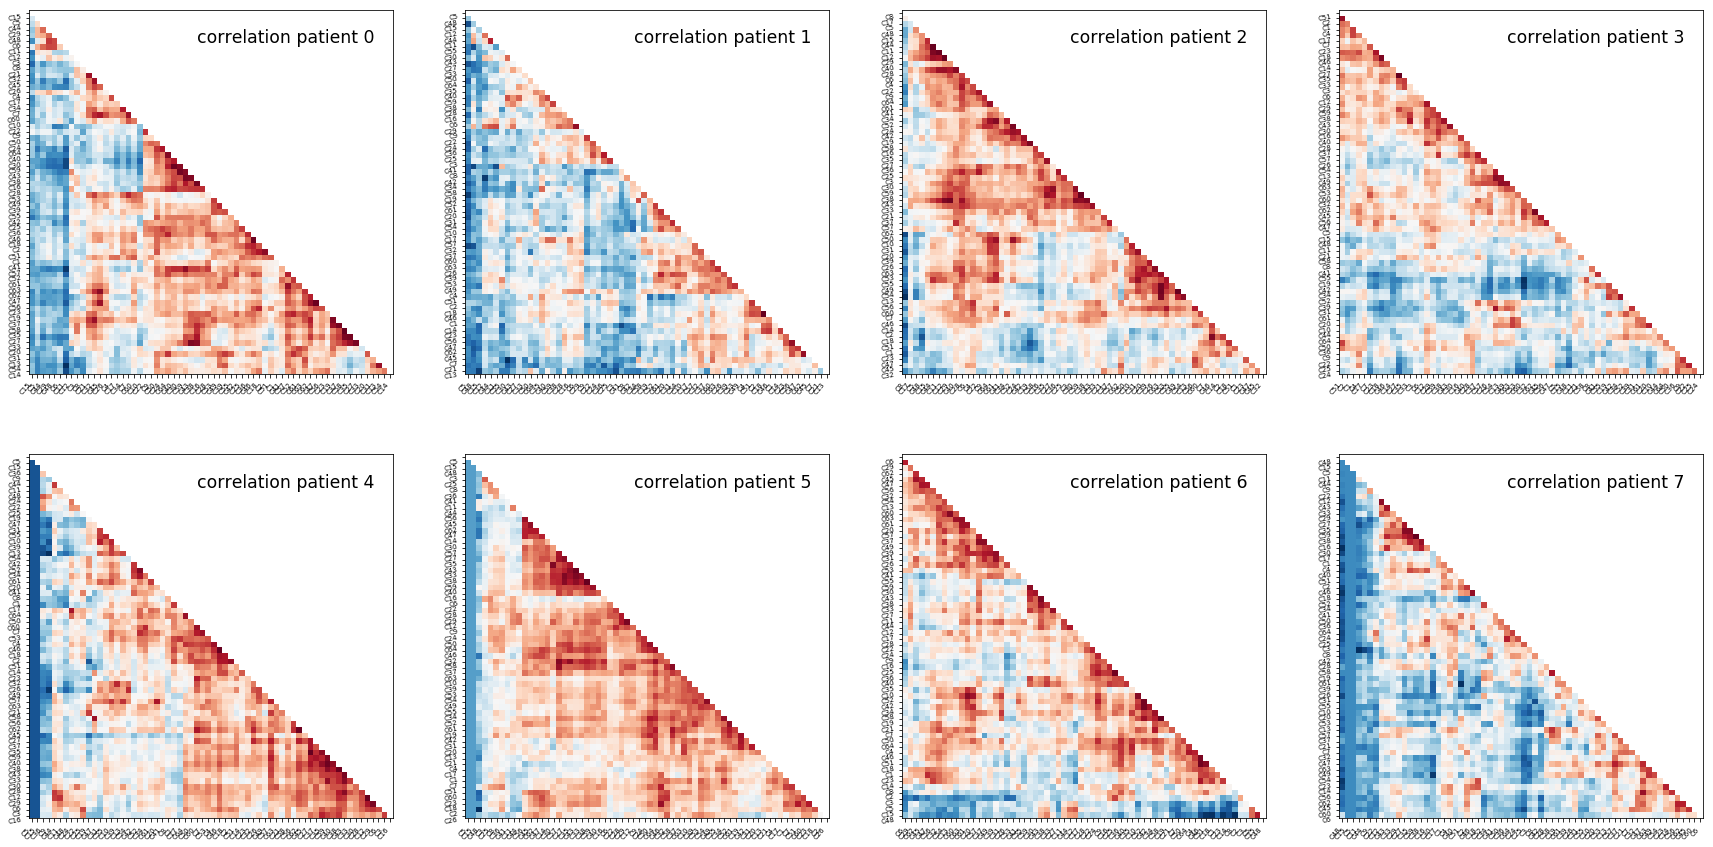

In [5]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(30, 15))

for mat, ax in zip(range(8), axes.ravel()):

    fmri_matrix = label_masker.fit_transform(os.path.join(func_prep[mat]))
    correlation_matrix = correlation_measure.fit_transform([fmri_matrix])[0]
    # Plot correlation matrix
    plotting.plot_matrix(correlation_matrix, tri='lower', colorbar=False, axes=ax, labels=labels, reorder=True,
                        title='correlation patient {}'.format(mat));

plt.show()

In [6]:
# let's load the dataset created

with np.load('fMRI_time_series.npz', allow_pickle=True) as npz_file:
    data = dict(npz_file.items())
    
print('Data loaded')
print('It is a dictionary with keys:', list(data.keys()))

X = data['matrix']
print('X shape:', X.shape)

y = data['targets']
print('y shape:', y.shape)

Data loaded
It is a dictionary with keys: ['matrix', 'targets']
X shape: (870,)
y shape: (870,)


In [8]:
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')

ASD = []
control = []

for sub in range(len(X)):
    if y[sub] == 1:
        ASD.append(X[sub])
    else:
        control.append(X[sub])

print('ASD patient :', len(ASD))
print('Control patient :', len(control))

ASD patient : 403
Control patient : 467


## Lets plot the mean matrix and connectomes of the two groups 

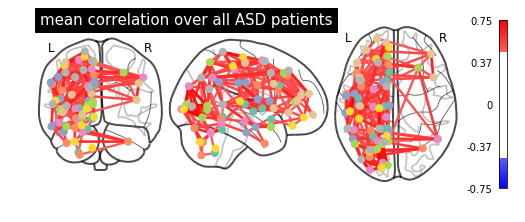

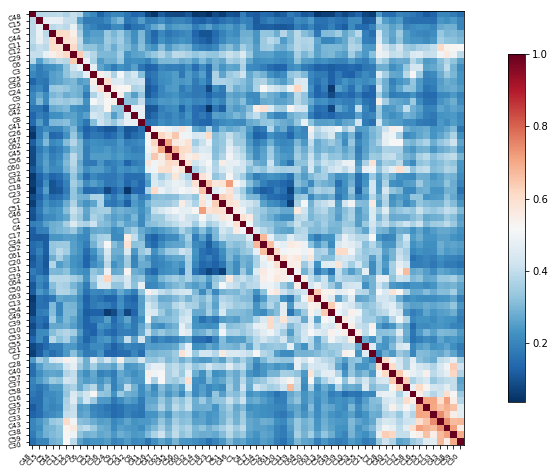

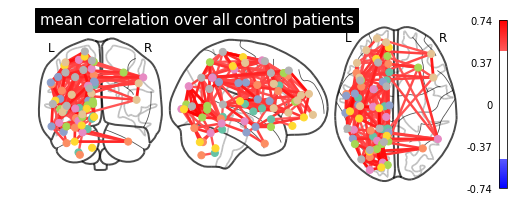

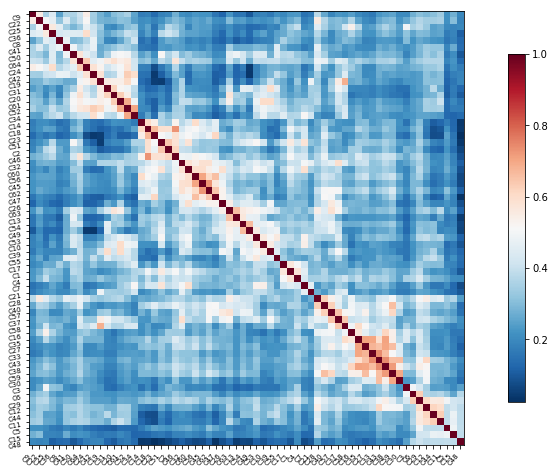

In [9]:
correlation_matrices_asd = correlation_measure.fit_transform(ASD)
mean_correlation_matrix_asd = correlation_measure.mean_
coords = plotting.find_parcellation_cut_coords(multiscale.scale064)

plotting.plot_connectome(mean_correlation_matrix_asd, coords,edge_threshold="90%",
                         title='mean correlation over all ASD patients', colorbar=True);
plotting.plot_matrix(mean_correlation_matrix_asd, figure=(10, 8), labels=labels,
                    reorder=True)


correlation_matrices_c = correlation_measure.fit_transform(control)
mean_correlation_matrix_c = correlation_measure.mean_

plotting.plot_connectome(mean_correlation_matrix_c, coords,edge_threshold="90%",
                         title='mean correlation over all control patients', colorbar=True);
plotting.plot_matrix(mean_correlation_matrix_c, figure=(10, 8), labels=labels,
                    reorder=True)

In [10]:
correlation_matrices = correlation_measure.fit_transform(ASD)
mean_correlation_matrix = correlation_measure.mean_

coords = plotting.find_parcellation_cut_coords(multiscale.scale064)
view = plotting.view_connectome(mean_correlation_matrix, coords, edge_threshold="90%",
                         symmetric_cmap=True, linewidth=6.0)
view

Looking at the results I get, a disproportionate amount of connexion on the left side. <br>
I also get almost no negative correlation which seems weird, looking at the results with vmax=0.8, vmin=0.8 does looks like a matrix with confounds. 

I am gonne modify my matrix using the 'high_variance_confounds' from nilearn to see if the matrix looks better since I don't have any confounds files. <br>


(64, 64)


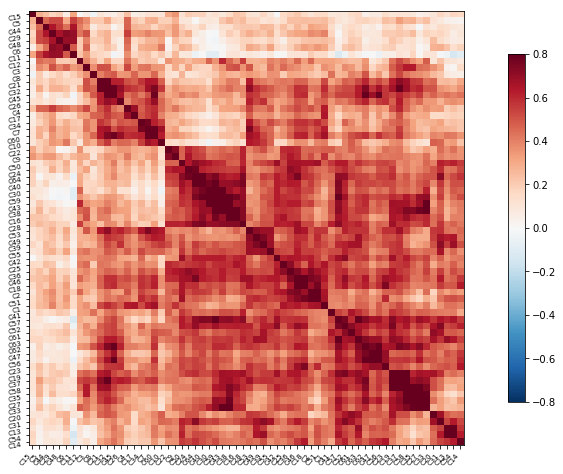

In [11]:
# example of a matrix with the vmax/vmin:

fmri_mat = label_masker.fit_transform(os.path.join(func_prep[0]))

correlation_matrices_ex = correlation_measure.fit_transform([fmri_mat])[0]
print(correlation_matrices_ex.shape)

plotting.plot_matrix(correlation_matrices_ex, figure=(10, 8), labels=labels,
                    reorder=True, vmax=0.8, vmin=-0.8);

This does looks like results with confounds!!

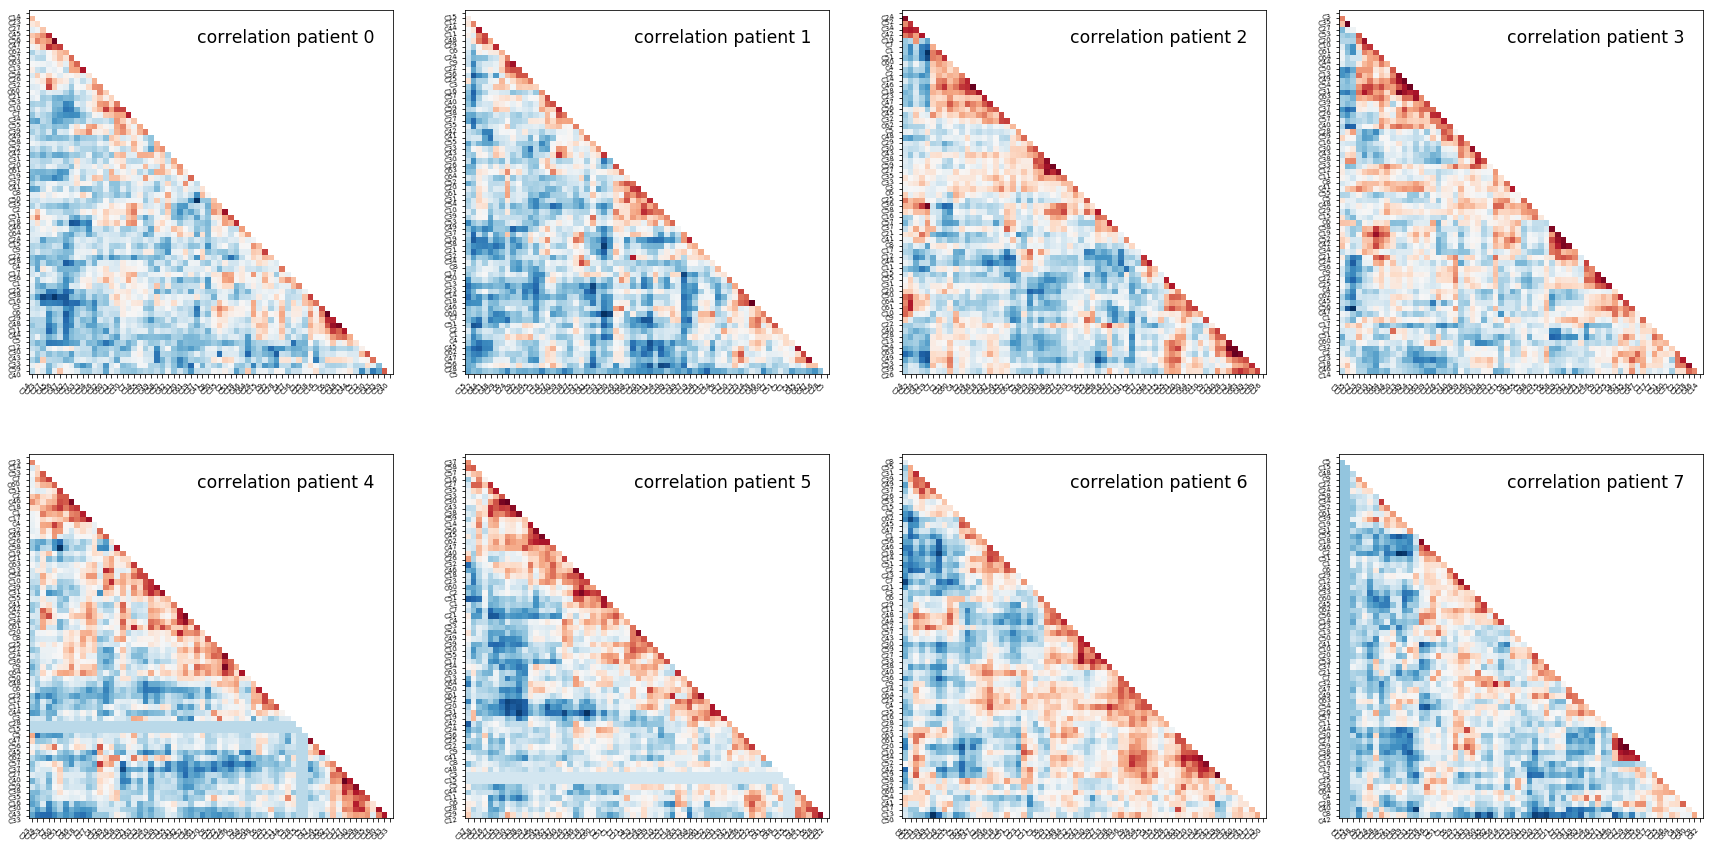

In [13]:
from nilearn import image
from nilearn import input_data
from nilearn.input_data import NiftiMapsMasker
from nilearn import connectome
# A "memory" to avoid recomputation
from nilearn._utils.compat import Memory
mem = Memory('nilearn_cache')

fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(30, 15))

for mat, ax in zip(range(8), axes.ravel()):

    hv_confounds = mem.cache(image.high_variance_confounds)(func_prep[mat])
    fmri_matrix = label_masker.fit_transform(os.path.join(func_prep[mat]), confounds=hv_confounds)
    correlation_matrix = correlation_measure.fit_transform([fmri_matrix])[0]
    # Plot correlation matrix
    plotting.plot_matrix(correlation_matrix, tri='lower', colorbar=False, axes=ax, labels=labels, reorder=True,
                        title='correlation patient {}'.format(mat));

plt.show()

In [15]:
# let's load the dataset created

with np.load('fMRI_time_series_confounds.npz', allow_pickle=True) as npz_file:
    data_conf = dict(npz_file.items())
    
print('Data loaded')
print('It is a dictionary with keys:', list(data_conf.keys()))

X_c = data_conf['matrix']
print('X shape:', X_c.shape)

y_c = data_conf['targets']
print('y shape:', y_c.shape)

correlation_measure = connectome.ConnectivityMeasure(kind='correlation')

ASD_conf = []
control_conf = []

for sub in range(len(X_c)):
    if y_c[sub] == 1:
        ASD_conf.append(X_c[sub])
    else:
        control_conf.append(X_c[sub])

print('ASD patient :', len(ASD_conf))
print('Control patient :', len(control_conf))

Data loaded
It is a dictionary with keys: ['matrix', 'targets']
X shape: (870,)
y shape: (870,)
ASD patient : 403
Control patient : 467


## Lets plot the mean of the two groups with the confounds removed 

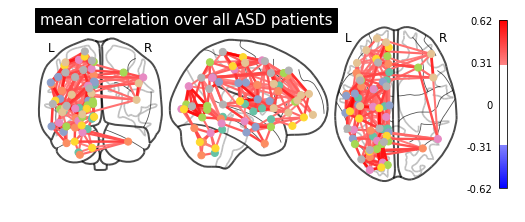

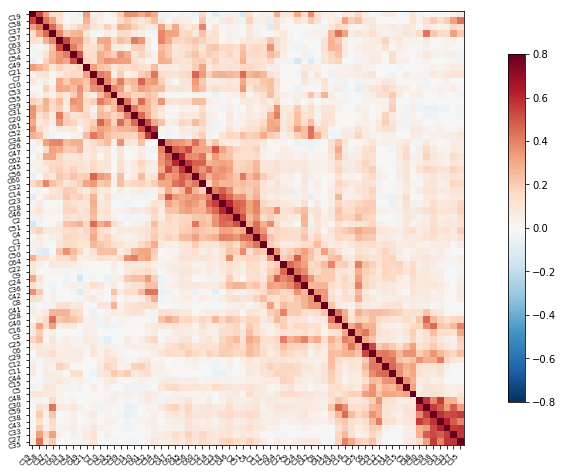

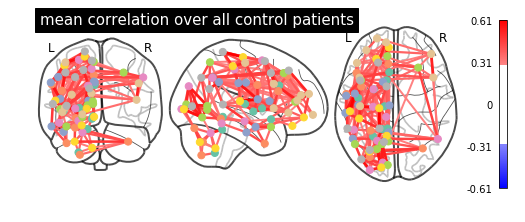

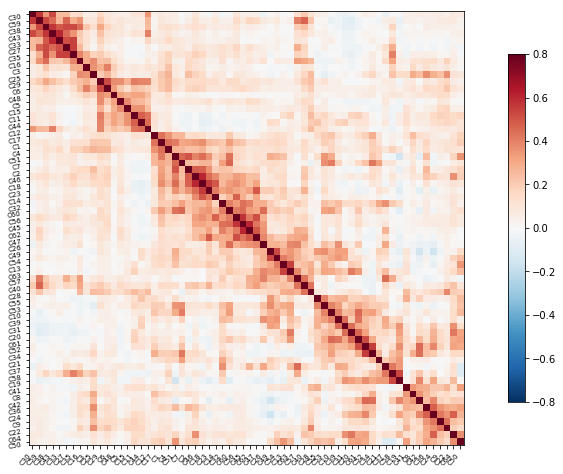

In [16]:
correlation_matrices_asd = correlation_measure.fit_transform(ASD_conf)
mean_correlation_matrix_asd = correlation_measure.mean_
coords = plotting.find_parcellation_cut_coords(multiscale.scale064)

plotting.plot_connectome(mean_correlation_matrix_asd, coords,edge_threshold="90%",
                         title='mean correlation over all ASD patients', colorbar=True);
plotting.plot_matrix(mean_correlation_matrix_asd, figure=(10, 8), labels=labels,
                    reorder=True, vmax=0.8, vmin=-0.8)


correlation_matrices_c = correlation_measure.fit_transform(control_conf)
mean_correlation_matrix_c = correlation_measure.mean_

plotting.plot_connectome(mean_correlation_matrix_c, coords,edge_threshold="90%",
                         title='mean correlation over all control patients', colorbar=True);
plotting.plot_matrix(mean_correlation_matrix_c, figure=(10, 8), labels=labels,
                    reorder=True, vmax=0.8, vmin=-0.8)

## Lets try with the tangent connectivity

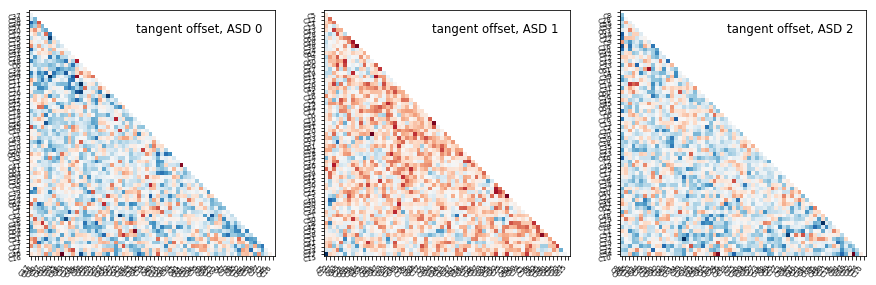

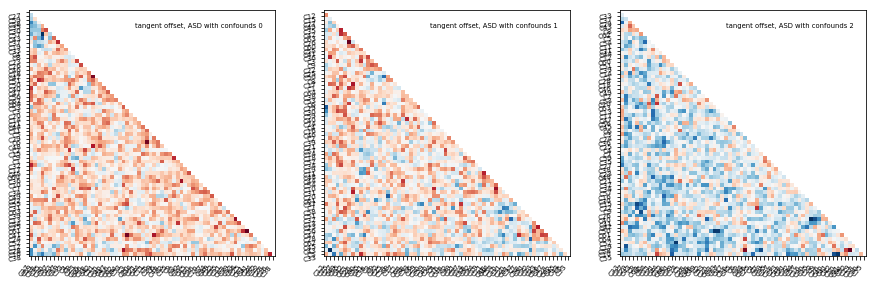

In [17]:
tangent_measure = connectome.ConnectivityMeasure(kind='tangent')
tangent_matrices = tangent_measure.fit_transform(ASD)

_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (matrix, ax) in enumerate(zip(tangent_matrices, axes)):
    plotting.plot_matrix(matrix, tri='lower', colorbar=False, axes=ax, labels=labels, reorder=True,
                         title='tangent offset, ASD {}'.format(i))

# With the confounds
tangent_matrices_conf = tangent_measure.fit_transform(ASD_conf)

_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (matrix, ax) in enumerate(zip(tangent_matrices_conf, axes)):
    plotting.plot_matrix(matrix, tri='lower', colorbar=False, axes=ax, labels=labels, reorder=True,
                         title='tangent offset, ASD with confounds {}'.format(i))

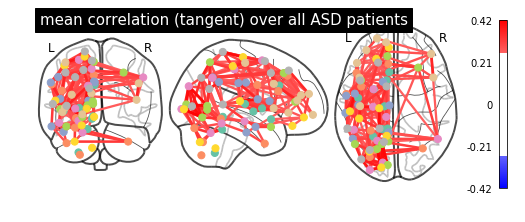

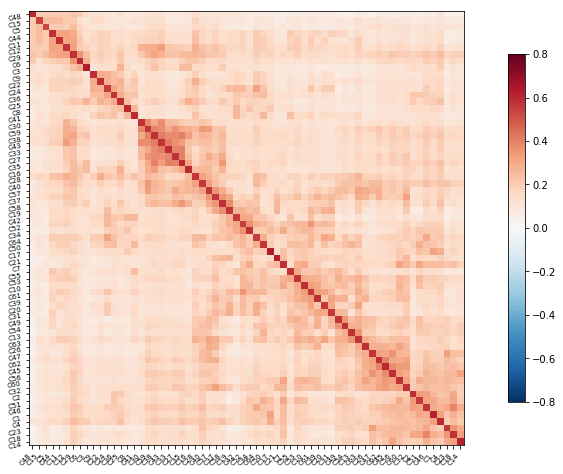

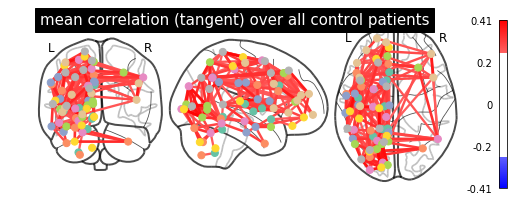

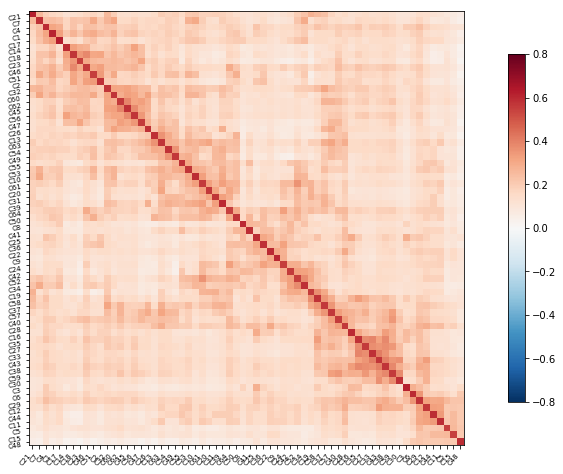

In [18]:
tangent_measure = connectome.ConnectivityMeasure(kind='tangent')

tangent_matrices = tangent_measure.fit_transform(ASD)
mean_tang = tangent_measure.mean_
plotting.plot_connectome(mean_tang, coords,edge_threshold="90%",
                         title='mean correlation (tangent) over all ASD patients', colorbar=True);
plotting.plot_matrix(mean_tang, figure=(10, 8), labels=labels,
                    reorder=True, vmax=0.8, vmin=-0.8)

tangent_matrices = tangent_measure.fit_transform(control)
mean_tang = tangent_measure.mean_
plotting.plot_connectome(mean_tang, coords,edge_threshold="90%",
                         title='mean correlation (tangent) over all control patients', colorbar=True);
plotting.plot_matrix(mean_tang, figure=(10, 8), labels=labels,
                    reorder=True, vmax=0.8, vmin=-0.8)

## Try with the MSDL atlas

I am happy with the results I get, but the lateralisation of the connexions still seems weird, I have almost no connexions on the left side. That is why I am gonne repeat the process with another atlas to see if the results are the same.

C:\Users\xavier\anaconda3\envs\exts-ml\lib\site-packages\numpy\lib\npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


MSDL has 39 ROIs, part of the following networks :
[b'Aud', b'Aud', b'Striate', b'DMN', b'DMN', b'DMN', b'DMN', b'Occ post', b'Motor', b'R V Att', b'R V Att', b'R V Att', b'R V Att', b'Basal', b'L V Att', b'L V Att', b'L V Att', b'D Att', b'D Att', b'Vis Sec', b'Vis Sec', b'Vis Sec', b'Salience', b'Salience', b'Salience', b'Temporal', b'Temporal', b'Language', b'Language', b'Language', b'Language', b'Language', b'Cereb', b'Dors PCC', b'Cing-Ins', b'Cing-Ins', b'Cing-Ins', b'Ant IPS', b'Ant IPS'].
[NiftiMapsMasker.fit_transform] loading regions from C:\Users\xavier/nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii
Resampling maps
[Memory]0.0s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min


C:\Users\xavier\AppData\Roaming\Python\Python36\site-packages\nilearn\_utils\cache_mixin.py:296: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.2s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


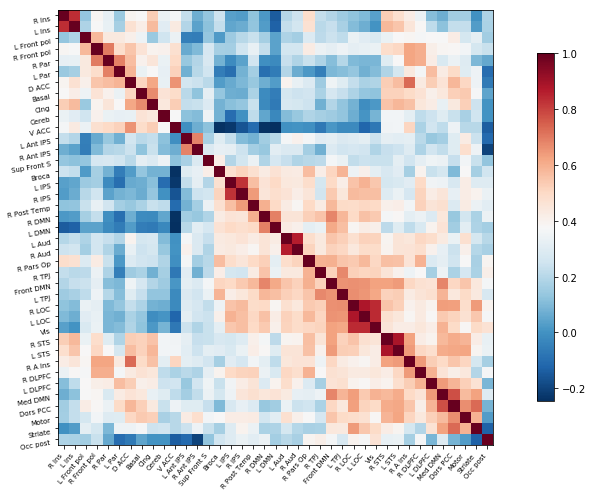

In [19]:
from nilearn.input_data import NiftiMapsMasker
from nilearn import connectome

atlas = datasets.fetch_atlas_msdl()
msdl_coords = atlas.region_coords
n_regions = len(msdl_coords)
print('MSDL has {0} ROIs, part of the following networks :\n{1}.'.format(
    n_regions, atlas.networks))
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels_msdl = atlas['labels']

masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5)
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')

fmri_matrix = masker.fit_transform(os.path.join(func_prep[0]))
correlation_matrix = correlation_measure.fit_transform([fmri_matrix])[0]

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels_msdl,
                    reorder=True)

[NiftiMapsMasker.fit_transform] loading regions from C:\Users\xavier/nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii
[Memory]3.5s, 0.1min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from C:\Users\xavier/nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii
[Memory]6.1s, 0.1min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from C:\Users\xavier/nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii
[Memory]8.8s, 0.1min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from C:\Users\xavier/nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii
[Memory]11.4s, 0.2min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded

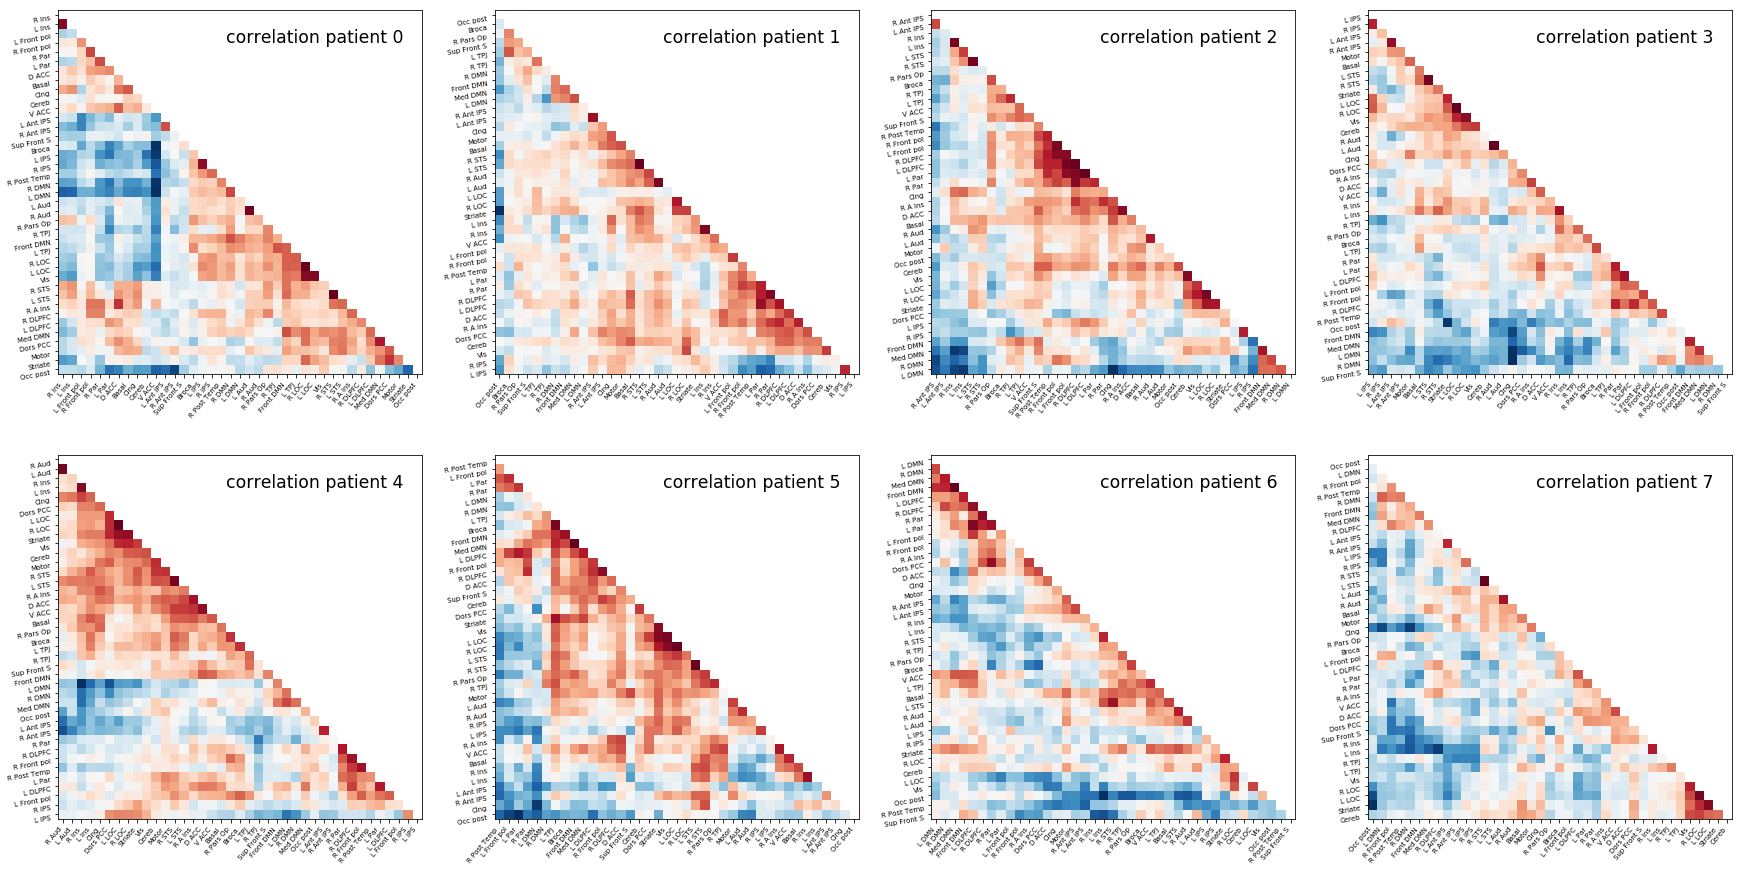

In [20]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(30, 15))

for mat, ax in zip(range(8), axes.ravel()):

    fmri_matrix = masker.fit_transform(os.path.join(func_prep[mat]))
    correlation_matrix = correlation_measure.fit_transform([fmri_matrix])[0]
    # Plot correlation matrix - note: matrix is ordered for block-like representation
    plotting.plot_matrix(correlation_matrix, tri='lower', colorbar=False, axes=ax, labels=labels_msdl, reorder=True,
                        title='correlation patient {}'.format(mat));

plt.show()

[NiftiMapsMasker.fit_transform] loading regions from C:\Users\xavier/nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii
[Memory]27.7s, 0.5min   : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
(39, 39)


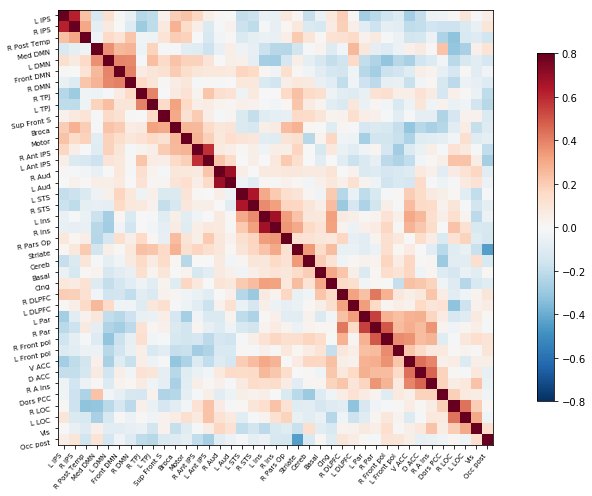

In [21]:
hv_confounds = mem.cache(image.high_variance_confounds)(func_prep[0])

fmri_mat = masker.fit_transform(os.path.join(func_prep[0]), confounds=hv_confounds)

correlation_matrices_ex = correlation_measure.fit_transform([fmri_mat])[0]
print(correlation_matrices_ex.shape)

plotting.plot_matrix(correlation_matrices_ex, figure=(10, 8), labels=labels_msdl,
                    reorder=True, vmax=0.8, vmin=-0.8);

In [22]:
# import warnings filter
from warnings import simplefilter
# ignore all user warnings
simplefilter(action='ignore', category=UserWarning)

ASD_msdl = []
control_msdl = []

masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache');

for subject in tqdm(range(len(func_prep))):
    hv_confounds = mem.cache(image.high_variance_confounds)(func_prep[subject])
    time_series = masker.fit_transform(os.path.join(func_prep[subject]), confounds=hv_confounds)
    if asd_fmri.phenotypic['DX_GROUP'][subject] == 1:
        ASD_msdl.append(time_series)
    else:
        control_msdl.append(time_series)
        
print('Data has {0} children.'.format(len(ASD_msdl)))
print('Data has {0} children.'.format(len(control_msdl)))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:36<00:00,  3.13s/it]

Data has 24 children.
Data has 26 children.


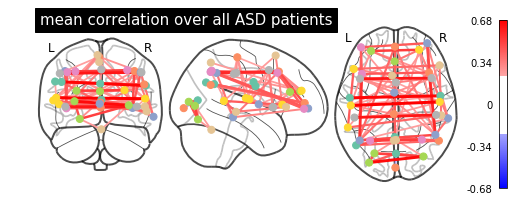

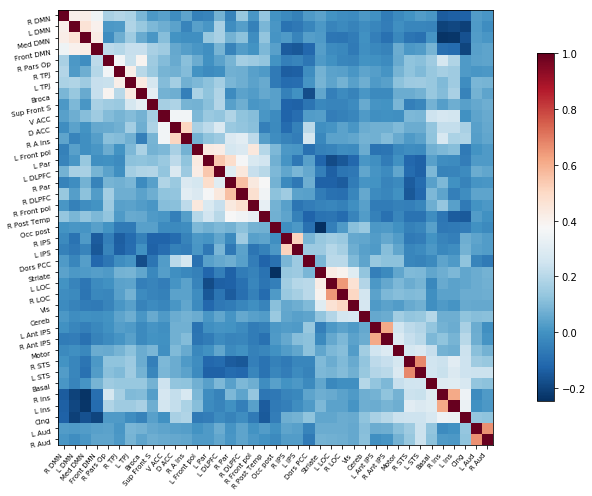

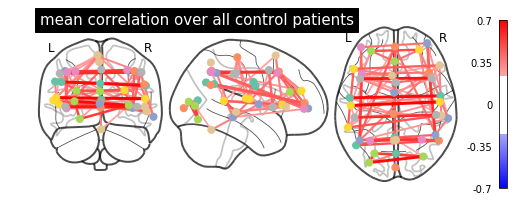

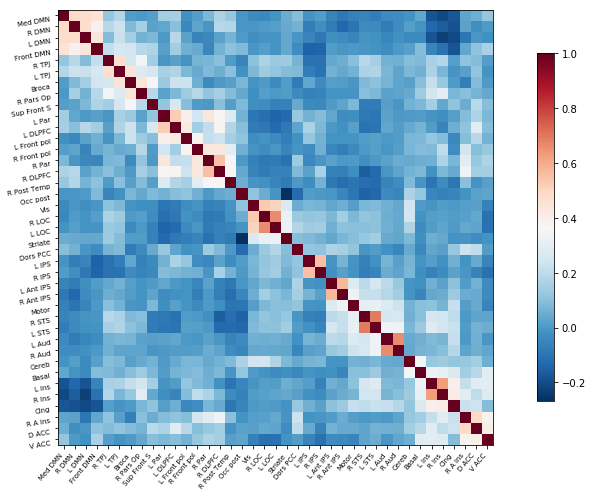

In [23]:
correlation_matrices_asd = correlation_measure.fit_transform(ASD_msdl)
mean_correlation_matrix_asd = correlation_measure.mean_

plotting.plot_connectome(mean_correlation_matrix_asd, msdl_coords,edge_threshold="90%",
                         title='mean correlation over all ASD patients', colorbar=True);
plotting.plot_matrix(mean_correlation_matrix_asd, figure=(10, 8), labels=labels_msdl,
                    reorder=True)


correlation_matrices_c = correlation_measure.fit_transform(control_msdl)
mean_correlation_matrix_c = correlation_measure.mean_

plotting.plot_connectome(mean_correlation_matrix_c, msdl_coords,edge_threshold="90%",
                         title='mean correlation over all control patients', colorbar=True);
plotting.plot_matrix(mean_correlation_matrix_c, figure=(10, 8), labels=labels_msdl,
                    reorder=True);

(24, 39, 39)


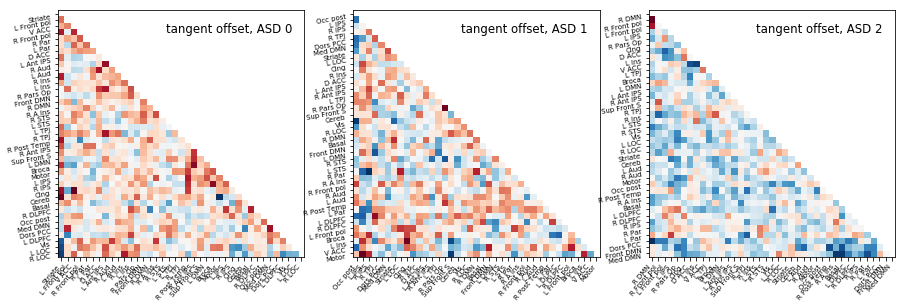

In [24]:
tangent_measure = connectome.ConnectivityMeasure(kind='tangent')
tangent_matrices = tangent_measure.fit_transform(ASD_msdl)
print(tangent_matrices.shape)

_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (matrix, ax) in enumerate(zip(tangent_matrices, axes)):
    plotting.plot_matrix(matrix, tri='lower', colorbar=False, axes=ax, labels=labels_msdl, reorder=True,
                         title='tangent offset, ASD {}'.format(i))

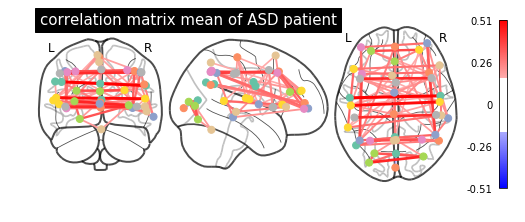

In [25]:
tangent_mean = tangent_measure.mean_

plotting.plot_connectome(tangent_mean, msdl_coords,edge_threshold="90%",
                         title='correlation matrix mean of ASD patient', colorbar=True);

## NOTE:

While exploring the data and particulary the difference between the two target groups, I realize that I have not talked about the difference that can exist between the different sites of acquisitions of the data. Since these data are the results of 17 studies regrouped, each could potentially bring difference in term of brain imaging. <br>
I decided to consiously put aside the sites difference and concentrate on the groups difference for several reasons:
* I don't think I have the knowledge to analyse the differences between the sites, all the images have been processed the same ways so it will be enough for me.
* I think the analyses of the sites and of the groups would go beyond the scope of this project (at least with my skills and knowledge on the acquisition of MRI data).

So here I acknowledge that the sites difference could modify my results but I explain why I decided not to take them into account.